<a href="https://colab.research.google.com/github/PowerSH/AI_Course/blob/master/06_3_Perceptrons_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Perceptrons - Training

Note for 717005@ Hallym University !

* Make a prediction with weights

In [0]:
def predict(X, w):
    bias = w[0]
    activation = bias + w[1]* X[0] + w[2]* X[1]
    if activation >= 0.0:
        return 1.0
    else:
        return 0.0

* Estimate Perceptron weights using stochastic gradient descent

In [0]:
def train_weights(train, l_rate, n_epoch): # train은 트레이닝 데이터셋, l_rate은 학습률(learning rate), n_epoch는 반복횟수, 
    # weights = [0.0 for i in range(len(train[0]))] # weights가 주어지지 않아서 0.0 을 len(train[0]) 만큼 넣는다.   
    weights = [0, 0, 0]
    print("------------------------")
    print(weights[0])
    print("------------------------")
    vb = []
    vw0 = []
    vw1 = []
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train: # 데이터 셋을 다 돌려라.
            prediction = predict(row, weights)
            error = row[-1] - prediction # 미분 기반
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error # weights를 변경해보자.            
            
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                vb.append(weights[0])
                vw0.append(weights[1])
                vw1.append(weights[2])
        print('epoch={}, error={}'.format(epoch, sum_error))
    return weights, vb,vw0,vw1

In [0]:
# test predictions
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

* Hyperparameters

In [0]:
l_rate = 0.1 # 에러를 수정하는 수치의 비율이라고 "일단은" 생각해두자.
n_epoch = 5

In [0]:
weights,vb,vw0,vw1 = train_weights(dataset, l_rate, n_epoch)

------------------------
0
------------------------
epoch=0, error=2.0
epoch=1, error=1.0
epoch=2, error=0.0
epoch=3, error=0.0
epoch=4, error=0.0


In [0]:
print(weights) # 06_2번 강의자료의 weights와 상당히 유사한 걸 알 수 있다.

[-0.1, 0.20653640140000007, -0.23418117710000003]


In [0]:
pred  = predict([8,5],weights) # 임의의 테스트 수행
print(pred)

1.0


* Why ?

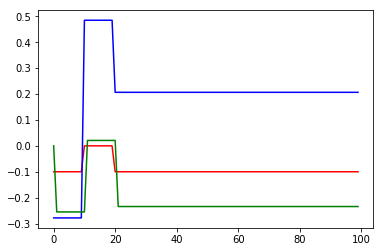

In [0]:
import matplotlib.pyplot as plt

plt.plot(vb, "r")
plt.plot(vw0, "b")
plt.plot(vw1, "g")

partial derivative with respect to m

$$ \frac{\partial J(m,b)}{\partial m} =  \frac{1}{n}\sum_{i=1}^{n} -2 x^{(i)} (y_{i}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} ((mx^{(i)} + b)-y^{(i)}) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} (\hat{y}^{(i)} -y^{(i)})$$

partial derivative with respect to b

$$ \frac{\partial J(m,b)}{\partial b} =  \frac{1}{n}\sum_{i=1}^{n} -2  (y^{(i)}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n}  ((mx^{(i)} + b)-y^{(i)}) \\
= \frac{2}{n}\sum_{i=1}^{n}  (\hat{y}^{(i)}-y^{(i)}) \\ $$


Partial derivatives : https://www.mathsisfun.com/calculus/derivatives-partial.html

* References

```
https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
```